In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot



In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [5]:
import yfinance as yf
import datetime

ticker = 'ICICIBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 2, 21)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,743.049988,766.000000,743.000000,764.700012,753.932556,9653095
2022-01-04,767.950012,778.000000,763.599976,772.849976,761.967834,12114437
2022-01-05,773.000000,795.849976,771.200012,788.049988,776.953796,19741360
2022-01-06,775.049988,792.500000,774.000000,785.049988,773.996033,13018067
2022-01-07,792.200012,802.299988,786.250000,793.250000,782.080566,12250210
...,...,...,...,...,...,...
2024-02-14,1009.549988,1035.699951,1007.549988,1022.700012,1022.700012,17878720
2024-02-15,1022.849976,1026.650024,1006.599976,1016.650024,1016.650024,10069878
2024-02-16,1023.200012,1026.199951,1016.900024,1023.250000,1023.250000,7159395


In [7]:
df.shape

(528, 6)

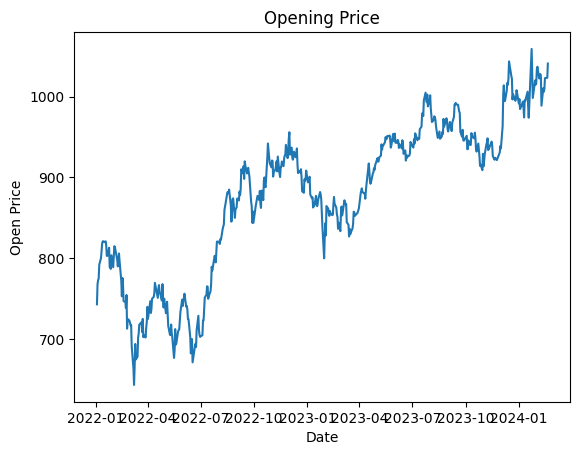

In [8]:
plt.figure()
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

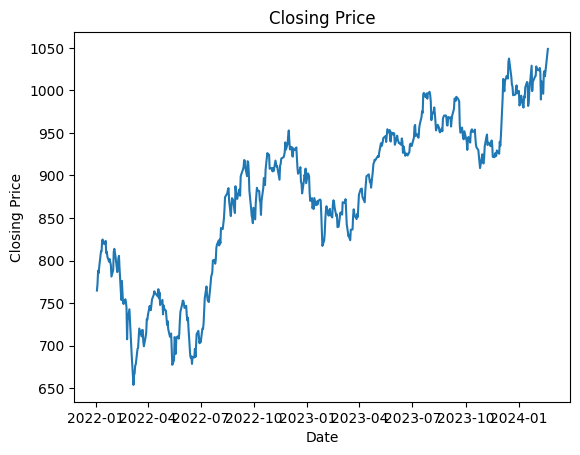

In [9]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Text(0.5, 0, 'Year')

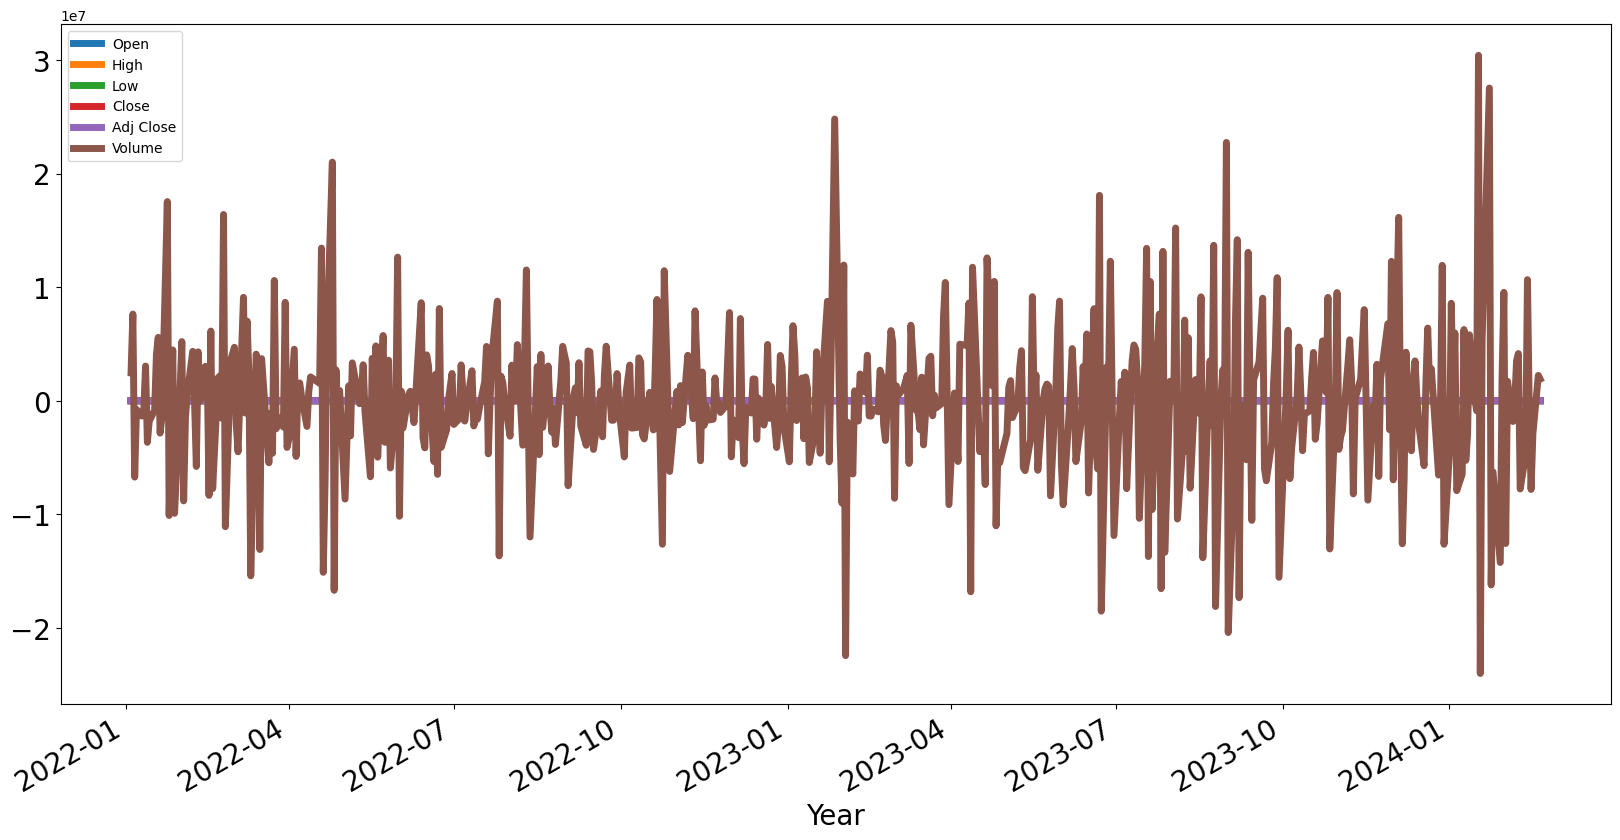

In [10]:
#First-order differencing
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 1.0, 'ICICIBANK Cumulative Returns')

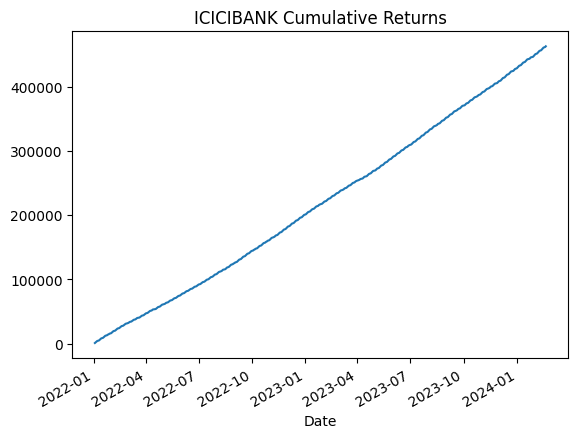

In [11]:
# Comulative Return
dr = df['Close'].cumsum()
dr.plot()
plt.title('ICICIBANK Cumulative Returns')

Text(0.5, 1.0, 'ICICIBANK Autocorrelation plot')

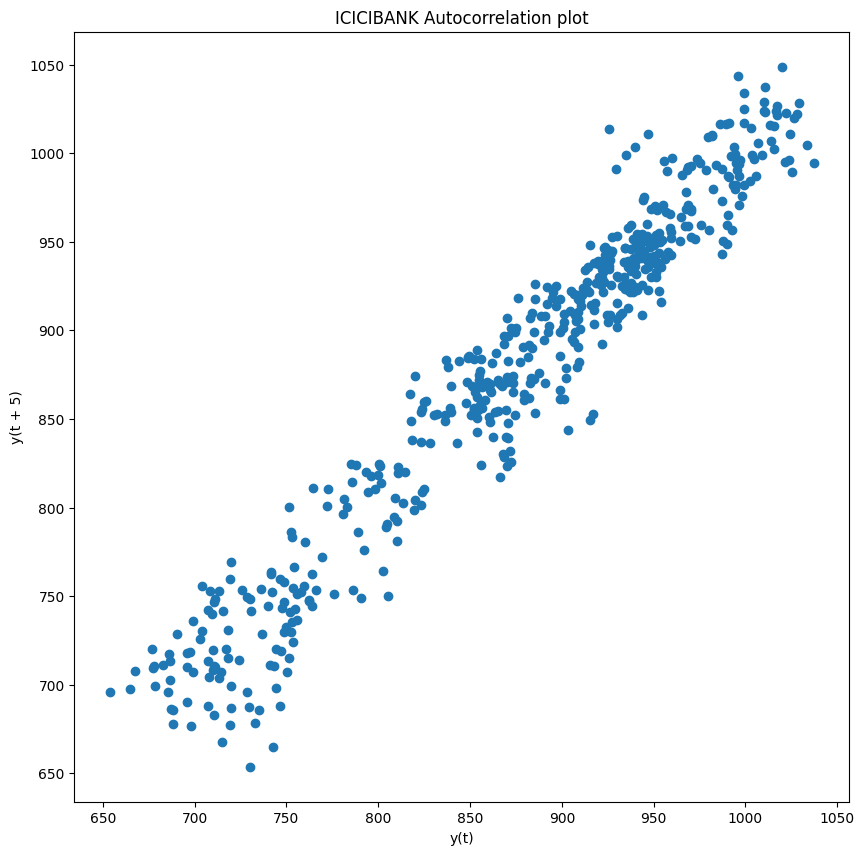

In [12]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('ICICIBANK Autocorrelation plot')

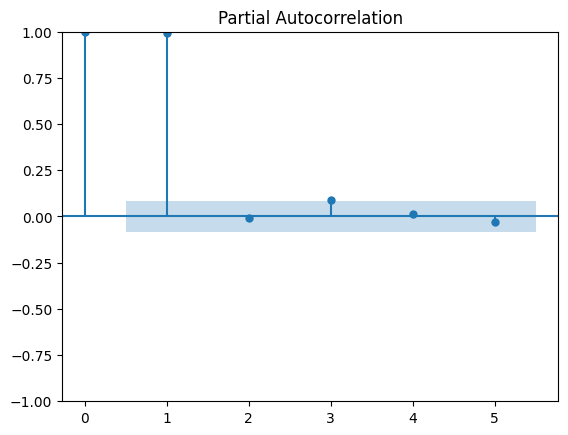

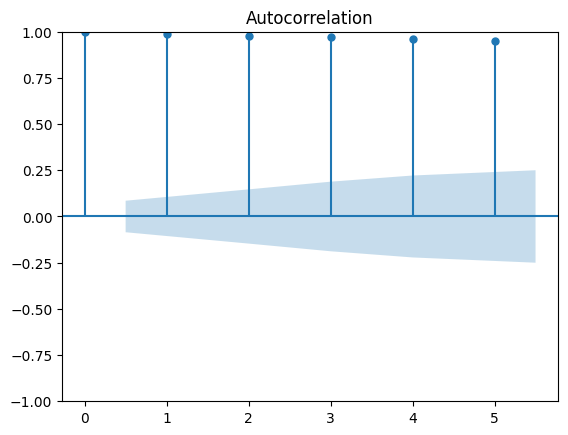

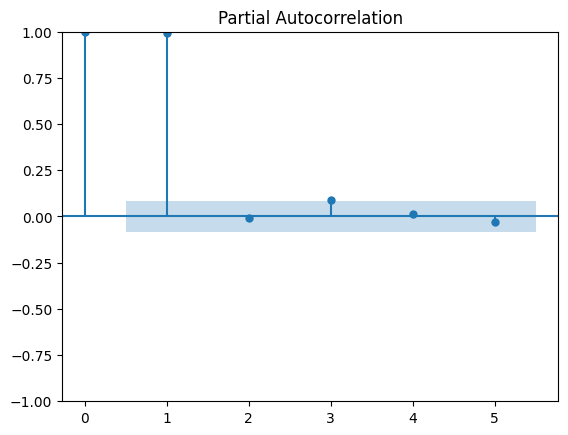

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'], lags=5)
plot_pacf(df['Close'], lags=5)

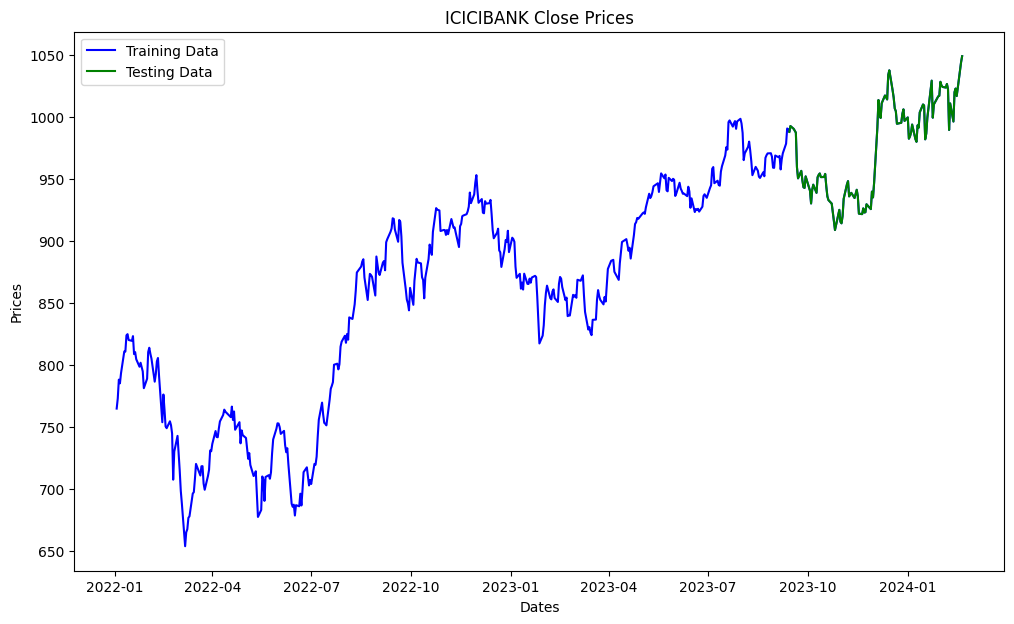

In [14]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('ICICIBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [32]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
predictions = list()

# SARIMA order
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

for t in range(len(test_ar)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False, method='powell', maxiter=1000)
    output = model_fit.get_forecast(steps=1)
    yhat = output.predicted_mean[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)



In [33]:
error = mean_squared_error(test_ar, predictions)
print('Mean Squared Error: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('Symmetric Mean Absolute Error: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 134.540
Symmetric Mean Absolute Error: 0.855
Root Mean Squared Error: 11.599146960615846
Mean Absolute Error: 8.361969622267718


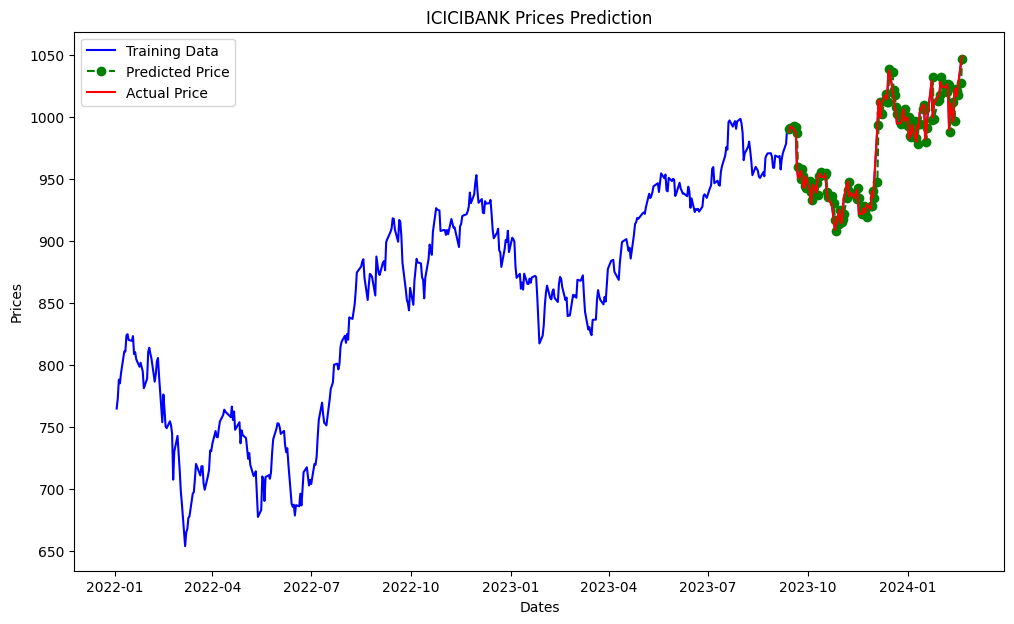

In [34]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

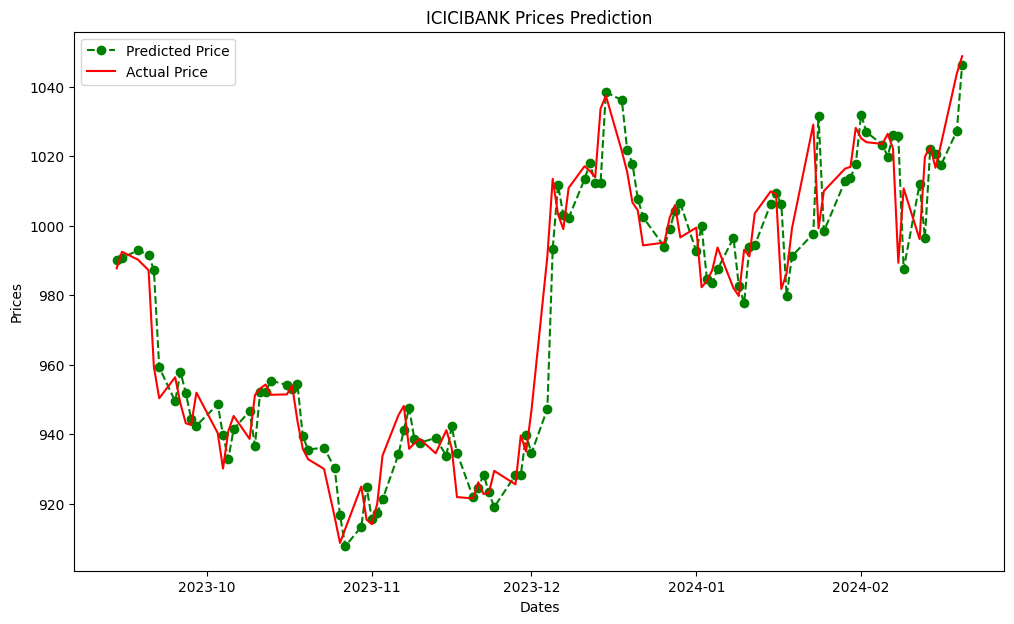

In [35]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [36]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.tail(10))

          Actual    Predicted
96   1022.150024  1026.101107
97    989.299988  1025.697213
98   1010.700012   987.379575
99    996.099976  1011.952238
100  1019.799988   996.525903
101  1022.700012  1022.173011
102  1016.650024  1020.682485
103  1023.250000  1017.365384
104  1043.750000  1027.202913
105  1048.750000  1046.272400


<h1><b>STOCK VALUE PREDICTED FOR TOMORROW<b></h1>

In [37]:

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# SARIMA order
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)

# Using the entire dataset to train the SARIMA model
model = SARIMAX(train_ar, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecasting one step ahead (for tomorrow)
forecast_steps = 1
forecast = model_fit.get_forecast(steps=forecast_steps)
predicted_values_tomorrow = forecast.predicted_mean

# Evaluate model performance
test_predictions = model_fit.get_prediction(start=len(train_ar), end=len(train_ar) + len(test_ar) - 1, dynamic=False)
predicted_values_test = test_predictions.predicted_mean

print('Predicted Stock Value for Tomorrow:', predicted_values_tomorrow[0])

Predicted Stock Value for Tomorrow: 990.0143632223429


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [38]:

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# SARIMA order
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)

# Using the entire dataset to train the SARIMA model
model = SARIMAX(train_ar, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecasting 60 days ahead
forecast_steps = 60
forecast = model_fit.get_forecast(steps=forecast_steps)
predicted_values_60_days = forecast.predicted_mean

# Evaluate model performance on test set
test_predictions = model_fit.get_prediction(start=len(train_ar), end=len(train_ar) + len(test_ar) - 1, dynamic=False)
predicted_values_test = test_predictions.predicted_mean

print('Predicted Stock Values for the Next 60 Days:', predicted_values_60_days)


Predicted Stock Values for the Next 60 Days: [ 990.01436322  993.08211315  993.39587668  994.97664999  995.06908229
  995.90369204  994.92039323  996.20875495  999.74419506 1001.17687844
 1000.96069915  997.24496672  997.48421751 1000.5021562  1000.82120271
 1002.42350562 1002.51302762 1003.34768663 1002.33564286 1003.64395798
 1007.18343963 1008.63443009 1008.45471984 1004.74780284 1004.98698285
 1008.00506634 1008.32409779 1009.92633756 1010.01586815 1010.85052698
 1009.8385673  1011.14682405 1014.68629388 1016.13723081 1015.95741389
 1012.25047111 1012.48965133 1015.5077344  1015.82676589 1017.42900584
 1017.51853641 1018.35319524 1017.34123531 1018.64949224 1022.1889621
 1023.63989918 1023.46008258 1019.75313987 1019.99232009 1023.01040316
 1023.32943465 1024.9316746  1025.02120518 1025.855864   1024.84390407
 1026.152161   1029.69163087 1031.14256794 1030.96275134 1027.25580863]
